In [286]:
import numpy as np
from scipy.linalg import norm 
import matplotlib.pyplot as plt
%run -i helper.py

In [287]:
flag1 = 0
flag2 = 1
q1 = 2
q2 = 3
reps = 200

In [288]:
#circuit with X error on q1
flag1_x = []
flag2_x = []
for n in range(1,11):
    flag1_temp = []
    flag2_temp = []
    for _ in range(reps):
        reg=Reg(4)
        X(q1, reg)
        H(flag2, reg)
        CNOT(q1, flag1, reg)
        CNOT(flag2, q2, reg)
        CRn(q1, q2, n, reg)
        CZ(q1, flag2, reg)
        CNOT(q1, flag1, reg)
        CNOT(flag2, q2, reg)
        H(flag2, reg)

        flag1_temp.append(measure(flag1, reg))
        flag2_temp.append(measure(flag2, reg))
    flag1_x.append(flag1_temp.count(1))
    flag2_x.append(flag2_temp.count(1))

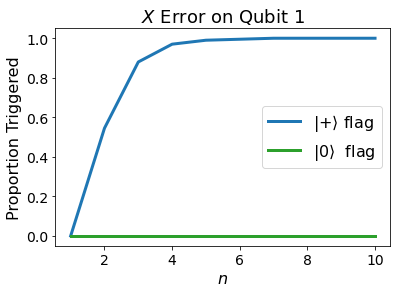

In [290]:
#reproduce results from cirq simulation
xax = np.linspace(1,10,10)
plt.plot(xax, np.array(flag2_x)/reps, label=r'$|$+$\rangle$ flag', color='tab:blue', lw=3)
plt.plot(xax, np.array(flag1_x)/reps, label=r'$|$0$\rangle$  flag', color='tab:green', lw=3)
plt.title(r'$X$ Error on Qubit 1', fontsize=18)
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel('Proportion Triggered', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()